<a href="https://colab.research.google.com/github/ankit221814/ClickStream-DataAnalysis/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Difference between K-Means and Hierarchical Clustering
Answer:
Feature	K-Means	Hierarchical Clustering
Type	Partition-based	Tree-based
Number of clusters	Must be predefined	Not required initially
Speed	Fast, scalable	Slower
Output	Flat clusters	Dendrogram (tree)
Best for	Large datasets	Small–medium datasets
Use Cases:
K-Means: Customer segmentation in e-commerce
Hierarchical: Biological taxonomy, document clustering

Question 2: Purpose of Silhouette Score
Answer:
Silhouette Score measures how well each data point lies within its cluster.
Range:
+1 → Well clustered
0 → Overlapping clusters
–1 → Wrong clustering
Purpose:
Evaluate cluster quality
Select optimal number of clusters

Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

Answer:- Parameter	Description
eps	Radius of neighborhood
min_samples	Minimum points to form a dense region
Effect:
Large eps → fewer clusters
Small eps → more clusters
Larger min_samples → stricter clustering

Question 4: Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?

Answer:
Clustering algorithms use distance metrics. If features are on different scales, large-value features dominate, causing biased clustering.
Benefits:
Fair distance computation
Better accuracy
Stable clusters

Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

Answer:
The Elbow Method plots WCSS (Within Cluster Sum of Squares) vs number of clusters.
The point where the curve bends like an elbow indicates the optimal K.

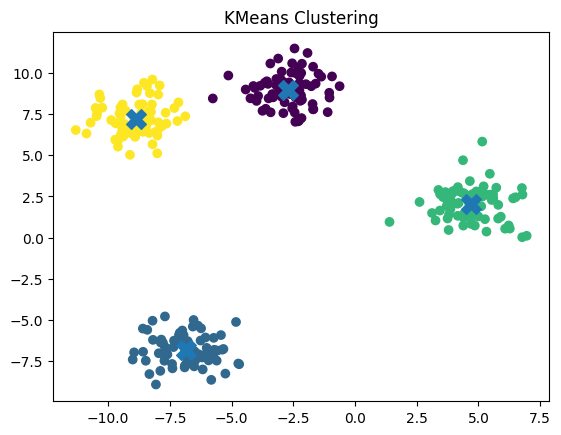

Cluster Centers:
 [[-2.70981136  8.97143336]
 [-6.83235205 -6.83045748]
 [ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]]


In [1]:
#Dataset:
#specified.
#Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
#Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
#apply KMeans clustering, and visualize the results with cluster centers.
#(Include your Python code and output in the code box below.)

#Answer:-
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='X', s=200)
plt.title("KMeans Clustering")
plt.show()

print("Cluster Centers:\n", kmeans.cluster_centers_)


In [3]:
#Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
#model. Print the number of clusters found (excluding noise).
#(Include your Python code and output in the code box below.)

#Answer:-
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load dataset
data = load_wine()
X = data.data

# Scale
X_scaled = StandardScaler().fit_transform(X)

# DBSCAN
db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X_scaled)

# Count clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)


Number of clusters: 0


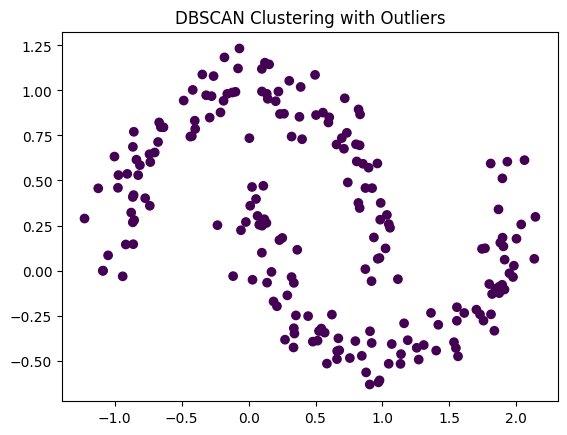

Number of outliers: 0


In [4]:
#Question 8: Generate moon-shaped synthetic data using
#make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
#the plot.
#(Include your Python code and output in the code box below.)

#Answer:-
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Generate data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN Clustering with Outliers")
plt.show()

# Outliers count
print("Number of outliers:", list(labels).count(-1))


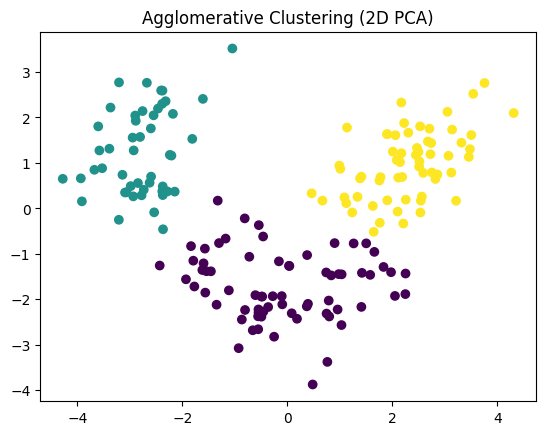

In [5]:
#Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
#Agglomerative Clustering and visualize the result in 2D with a scatter plot.
#(Include your Python code and output in the code box below.)

#Answer:-

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load data
X, y = load_wine(return_X_y=True)

# Scale
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title("Agglomerative Clustering (2D PCA)")
plt.show()



In [6]:
#Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.
#Describe your real-world data scienceworkflow using clustering:

#Which clustering algorithm(s) would you use and why?

#How would you preprocess the data (missing values, scaling)?

#How would you determine the number of clusters?

#How would the marketing team benefit from your clustering analysis?
#(Include your Python code and output in the code box below.)

#Answer:-
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Simulated customer dataset
X = np.random.rand(300, 5)

# Scaling
X_scaled = StandardScaler().fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Evaluation
print("Silhouette Score:", silhouette_score(X_scaled, labels))


Silhouette Score: 0.16572697168751005
